# DRAW PLOTS
Possible kind: `GLITCH`, `MULTI_GLITCH` and `NO_GLITCH`

In [1]:
%matplotlib inline

# Reading files
import h5py
import toml

# Scientific computing
import numpy as np
import pandas as pd

# Plot
import matplotlib.pyplot as plt; #plt.xkcd()
import seaborn as sns
sns.set()
sns.set_context('paper')

# Other
import os
import subprocess
from random import choice
import time as pytime
from IPython.display import display, clear_output

# Suppress NaturalNameWarning raised by HDFStore
import warnings
import tables
warnings.filterwarnings('ignore', category=tables.NaturalNameWarning)

Select kind and number.

In [2]:
kind = 'MULTI_GLITCH'
number = 54

kind_2 = 'GLITCH'
number_2 = 42

Print and save the plot.

Text(0, 0.5, 'Signal [ $\\mathrm{T}_\\mathrm{CMB}$ V / W ]')

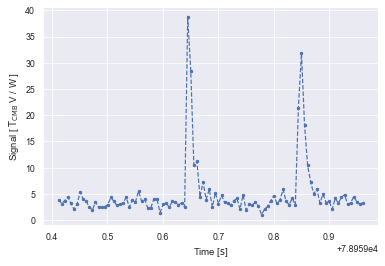

In [3]:
with pd.HDFStore('../classification/ris/OUT-classified.h5', mode='r') as data:
    d_target = data[kind + '/' + str(number)]
    d_target_2 = data[kind_2 + '/' + str(number_2)]

#plt.rcParams["font.family"] = "serif"
#plt.rcParams["mathtext.fontset"] = "dejavuserif"

plt.plot(d_target.index, d_target['data']+3, marker='.', linestyle='dashed')
#plt.plot(d_target_2.index, d_target_2['data']+3, marker='.', linestyle='dashed')
plt.xlabel(r'Time [$\mathrm{s}$]')
plt.ylabel(r'Signal [ $\mathrm{T}_\mathrm{CMB}$ V / W ]')
#plt.savefig(kind + '_' + str(number) + '.pdf')

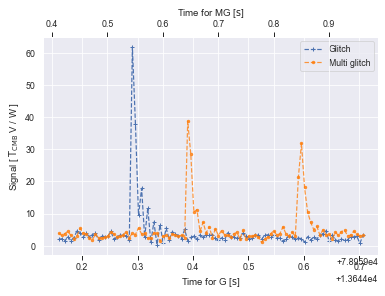

In [4]:
with pd.HDFStore('../classification/ris/OUT-classified.h5', mode='r') as data:
    d_target = data[kind + '/' + str(number)]
    d_target_2 = data[kind_2 + '/' + str(number_2)]

fig, ax1 = plt.subplots()

lns1 = ax1.plot(d_target_2.index, d_target_2['data']+3, marker='+', linestyle='dashed', label='Glitch')
ax1.set_xlabel(r'Time for G [$\mathrm{s}$]')

ax1.set_ylabel(r'Signal [ $\mathrm{T}_\mathrm{CMB}$ V / W ]')

ax2 = ax1.twiny() # ax1 and ax2 share y-axis
lns2 = ax2.plot(d_target.index, d_target['data']+3, marker='.', linestyle='dashed', color=u'#ff7f0e', alpha=0.8, label='Multi glitch')
ax2.set_xlabel(r'Time for MG [$\mathrm{s}$]')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#plt.savefig('G_MG_ds.pdf')